In [1]:
# IMPORT TOOLS
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('seaborn-v0_8')
print("✅ All tools imported successfully")

✅ All tools imported successfully


In [2]:
# DOWNLOAD STOCK DATA

ticker = "SPY"
data = yf.download(ticker,start="2018-01-01", end="2023-12-31")

print("📊 First 5 rows of our data:")
print(data.head())

print("\n 📈Data info:")
print(data.info())

C:\Users\Aadya Nair\AppData\Local\Temp\ipykernel_21440\1188041409.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start="2018-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed

📊 First 5 rows of our data:
Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2018-01-02  237.909149  237.944564  236.696460  237.085941  86655700
2018-01-03  239.413864  239.564356  238.077238  238.077238  90070400
2018-01-04  240.423065  240.909929  239.475946  240.060166  80636400
2018-01-05  242.025208  242.149118  240.723996  241.219693  83524000
2018-01-08  242.467758  242.627084  241.635689  241.927786  57319200

 📈Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2018-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, SPY)   1509 non-null   float64
 1   (High, SPY)    1509 non-null   float64
 2   (Low, SPY)     1509 non-null   float64
 3   (Open, SPY)    1509 non-null   float64
 4   (Volume, SPY)

In [3]:
# CALCULATE MOVING AVERAGES
short_window = 50
long_window = 200

data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

print("📊Data with Moving Averages:")
print(data[['Close','Short_MA','Long_MA']].tail(10))

📊Data with Moving Averages:
Price            Close    Short_MA     Long_MA
Ticker             SPY                        
Date                                          
2023-12-15  459.360901  430.906121  418.335547
2023-12-18  461.944885  431.770649  418.696862
2023-12-19  464.753876  432.637743  419.070872
2023-12-20  458.313660  433.332166  419.442568
2023-12-21  462.659363  434.078801  419.832859
2023-12-22  463.589142  434.895890  420.263279
2023-12-26  465.546692  435.794243  420.730722
2023-12-27  466.388428  436.620919  421.205025
2023-12-28  466.564575  437.451507  421.649502
2023-12-29  465.213898  438.368353  422.099036


In [4]:
# Create trading signals
# 1 = Buy, -1 = Sell, 0 = Do nothing
data['Signal'] = 0
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1, -1)

# We only want signals when we have enough data (after 200 days)
data['Signal'] = data['Signal'].where(data['Long_MA'].notna(), 0)

# Let's see our signals
print("🎯 Our trading signals:")
print(data[['Close', 'Short_MA', 'Long_MA', 'Signal']].tail(15))

🎯 Our trading signals:
Price            Close    Short_MA     Long_MA Signal
Ticker             SPY                               
Date                                                 
2023-12-08  448.606049  426.728239  416.489848      1
2023-12-11  450.350922  427.401050  416.830842      1
2023-12-12  452.407745  428.118314  417.175611      1
2023-12-13  458.646515  429.071869  417.558661      1
2023-12-14  460.118500  429.995011  417.956397      1
2023-12-15  459.360901  430.906121  418.335547      1
2023-12-18  461.944885  431.770649  418.696862      1
2023-12-19  464.753876  432.637743  419.070872      1
2023-12-20  458.313660  433.332166  419.442568      1
2023-12-21  462.659363  434.078801  419.832859      1
2023-12-22  463.589142  434.895890  420.263279      1
2023-12-26  465.546692  435.794243  420.730722      1
2023-12-27  466.388428  436.620919  421.205025      1
2023-12-28  466.564575  437.451507  421.649502      1
2023-12-29  465.213898  438.368353  422.099036      1


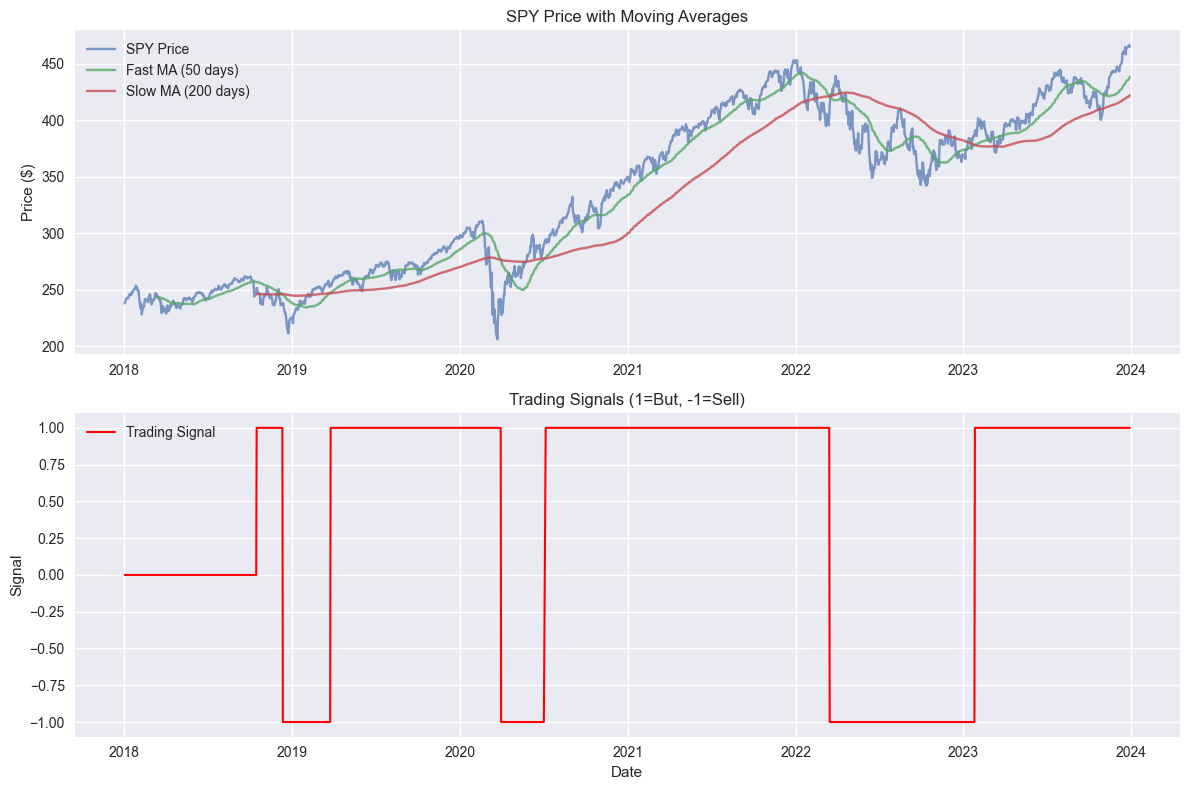

In [5]:
# VISUALIZE WHAT WE HAVE SO FAR
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(data['Close'], label='SPY Price', alpha=0.7)
plt.plot(data['Short_MA'],label=f'Fast MA ({short_window} days)', alpha=0.8)
plt.plot(data['Long_MA'],label=f'Slow MA ({long_window} days)', alpha=0.8)
plt.title('SPY Price with Moving Averages')
plt.legend()
plt.ylabel('Price ($)')

plt.subplot(2,1,2)
plt.plot(data['Signal'],label='Trading Signal', color='red', linewidth=1.5)
plt.title('Trading Signals (1=But, -1=Sell)')
plt.legend()
plt.ylabel('Signal')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

In [6]:
# CALCULATE STRATEGY RUNS

# Calculate daily returns for the stock
data['Returns'] = data['Close'].pct_change()

# Calculate strategy return (we buy/sell based on yesterday's signal)
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']

# Returns = daily percentage change in price
# Strategy_Returns = our profit/loss each day based on our signals
# shift(1) means we use yesterday's signal to trade today (realistic!)

# Remove missing values
data = data.dropna()

print("📈First look at our returns:")
print(data[['Returns','Strategy_Returns','Signal']].head(10))

📈First look at our returns:
Price        Returns Strategy_Returns Signal
Ticker                                      
Date                                        
2018-10-16  0.021866         0.000000      1
2018-10-17  0.000178         0.000178      1
2018-10-18 -0.014441        -0.014441      1
2018-10-19 -0.000543        -0.000543      1
2018-10-22 -0.004489        -0.004489      1
2018-10-23 -0.005091        -0.005091      1
2018-10-24 -0.030298        -0.030298      1
2018-10-25  0.017940         0.017940      1
2018-10-26 -0.017587        -0.017587      1
2018-10-29 -0.005540        -0.005540      1


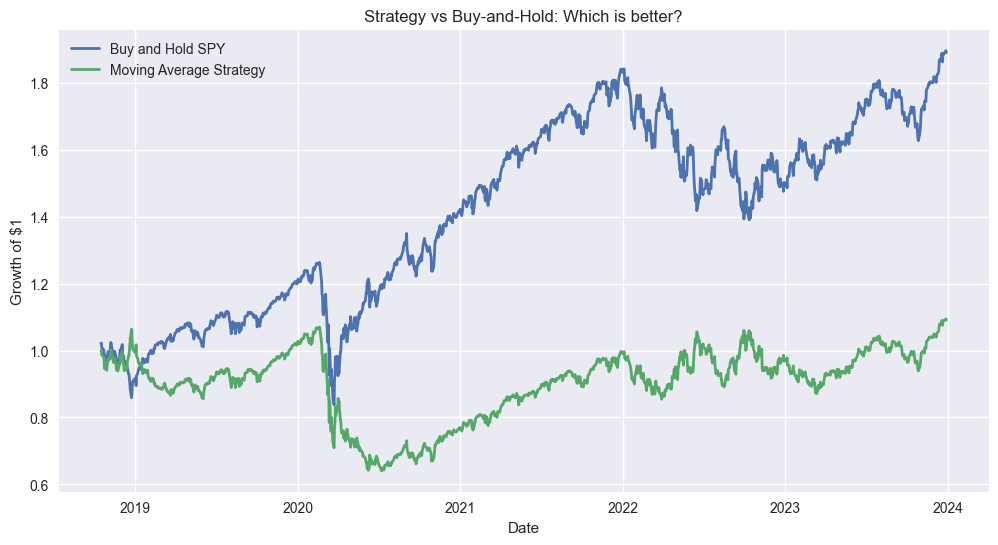

🎯 FINAL RESULT:
Buy-and-Hold Return: 89.06%
Strategy Return: 9.12%


In [7]:
# COMPARE TO BUY AND HOLD

# Calculate cumulative returns for both strategies
data['Cumulative_Market'] = (1 + data['Returns']).cumprod()
data['Cumulative_Strategy'] = (1 + data['Strategy_Returns']).cumprod()

# Plotting the comparisons
plt.figure(figsize = (12,6))
plt.plot(data['Cumulative_Market'], label='Buy and Hold SPY', linewidth=2)
plt.plot(data['Cumulative_Strategy'], label='Moving Average Strategy', linewidth=2)
plt.title('Strategy vs Buy-and-Hold: Which is better?')
plt.ylabel('Growth of $1')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

final_market_return = (data['Cumulative_Market'].iloc[-1] - 1) * 100
final_strategy_return = (data['Cumulative_Strategy'].iloc[-1] - 1) * 100

print(f"🎯 FINAL RESULT:")
print(f"Buy-and-Hold Return: {final_market_return:.2f}%")
print(f"Strategy Return: {final_strategy_return:.2f}%")